In [1]:
import os
import h5py
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from scipy.sparse import csr_matrix

print(tf.__version__)
print(keras.__version__)


2.9.1
2.9.0


In [2]:
import textacy


import tensorflow as tf
import numpy as np

# from tensorflow.python.keras.preprocessing import sequence
# from tensorflow.python.keras.preprocessing import text
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('DATASET_2')
char_types = os.listdir('DATASET_2')
print(char_types)
print ("Folders=",len(char_types))

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '6', '7', '8', '9']
Folders= 52


In [3]:
print("Hello")

Hello


In [4]:
chars = []

for item in char_types:
    all_char = os.listdir('DATASET_2' + '/' + item) 
    
    for char in all_char:
        chars.append((item , str('DATASET_2' + '/' + item) + '/'+ char))
        
chars

[('1', 'DATASET_2/1/1.png'),
 ('1', 'DATASET_2/1/10.png'),
 ('1', 'DATASET_2/1/11.png'),
 ('1', 'DATASET_2/1/12.png'),
 ('1', 'DATASET_2/1/13.png'),
 ('1', 'DATASET_2/1/14.png'),
 ('1', 'DATASET_2/1/15.png'),
 ('1', 'DATASET_2/1/16.png'),
 ('1', 'DATASET_2/1/17.png'),
 ('1', 'DATASET_2/1/18.png'),
 ('1', 'DATASET_2/1/19.png'),
 ('1', 'DATASET_2/1/2.png'),
 ('1', 'DATASET_2/1/20.png'),
 ('1', 'DATASET_2/1/21.png'),
 ('1', 'DATASET_2/1/22.png'),
 ('1', 'DATASET_2/1/23.png'),
 ('1', 'DATASET_2/1/24.png'),
 ('1', 'DATASET_2/1/25.png'),
 ('1', 'DATASET_2/1/26.png'),
 ('1', 'DATASET_2/1/27.png'),
 ('1', 'DATASET_2/1/28.png'),
 ('1', 'DATASET_2/1/29.png'),
 ('1', 'DATASET_2/1/3.png'),
 ('1', 'DATASET_2/1/30.png'),
 ('1', 'DATASET_2/1/31.png'),
 ('1', 'DATASET_2/1/32.png'),
 ('1', 'DATASET_2/1/33.png'),
 ('1', 'DATASET_2/1/34.png'),
 ('1', 'DATASET_2/1/35.png'),
 ('1', 'DATASET_2/1/36.png'),
 ('1', 'DATASET_2/1/37.png'),
 ('1', 'DATASET_2/1/38.png'),
 ('1', 'DATASET_2/1/39.png'),
 ('1', 'DATAS

In [5]:
chars_df = pd.DataFrame(data= chars, columns = ['Char_type', 'image'])
chars_df.head(3)

,Char_type,image
0,1,DATASET_2/1/1.png
1,1,DATASET_2/1/10.png
2,1,DATASET_2/1/11.png


In [6]:
image_count = chars_df['Char_type'].value_counts()
image_count

36    47
52    45
41    45
39    45
24    45
37    45
19    45
11    45
31    45
30    45
49    45
1     45
26    45
27    45
6     45
35    45
47    45
48    45
2     45
20    45
10    45
34    45
22    45
45    45
43    45
3     45
17    45
44    45
32    45
15    45
4     45
25    45
50    45
21    45
40    45
5     45
42    45
18    45
29    45
46    45
14    45
13    45
12    45
28    45
16    45
33    45
23    45
51    45
38    45
8     44
9     44
7     44
Name: Char_type, dtype: int64

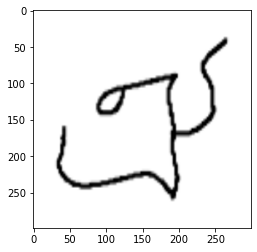

In [7]:
import cv2
path ='DATASET_2/'
im_size = 299
images = []
labels = []

for i in char_types:
    data_path= path+ str(i) #entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
#print (filenames) #will get the names of all images
    for f in filenames:
        img=cv2.imread(data_path+ '/'+ f) #reading that image as array
        #print(img) #will get the imoge as an array
        
        img = cv2.resize(img, (im_size, im_size),1)
#         inputCopy = img.copy()
#         converted_img = cv2.cvtColor(inputCopy, cv2.COLOR_GRAY2BGR)
#         dst = cv2.fastNlMeansDenoisingColored(converted_img, None, 10, 10, 7, 15) 
        images.append(img)
        
        labels.append(i)
plt.imshow(img)

In [8]:
images =np.array(images)
images.shape

(2339, 299, 299, 3)

In [9]:
images = images.astype( 'int16') / 255.0
# images = images.astype( 'int16') / 255.0
# images = images.astype( 'int16') / 255.0
# chars_df
# images.shape

In [10]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# y= chars_df['Char_type'].values
# #
# y_labelencoder= LabelEncoder ()
# y= y_labelencoder.fit_transform (y)
# #print (y)
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[0])  #
# Y= onehotencoder.fit_transform(y)
# Y.shape #(393, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = chars_df
dfle.Char_type = le.fit_transform(dfle.Char_type)
dfle


,Char_type,image
0,0,DATASET_2/1/1.png
1,0,DATASET_2/1/10.png
2,0,DATASET_2/1/11.png
3,0,DATASET_2/1/12.png
4,0,DATASET_2/1/13.png
...,...,...
2334,51,DATASET_2/9/5.png
2335,51,DATASET_2/9/6.png
2336,51,DATASET_2/9/7.png
2337,51,DATASET_2/9/8.png


In [12]:

Y = dfle[['Char_type']].values
Y


array([[ 0],
       [ 0],
       [ 0],
       ...,
       [51],
       [51],
       [51]])

In [13]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Char_type', OneHotEncoder(), [0])], remainder = 'passthrough')

In [30]:
Y = csr_matrix(Y)
Y.todense()
Y.toarray()
Y = ct.fit_transform(Y.todense())
Y

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
from sklearn. utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state= 415)

# einpect the shape of the training and testing.

print (train_x. shape)
print (train_y. shape)
print (test_x. shape)
print (test_y.shape)

(2222, 299, 299, 3)
(2222, 54)
(117, 299, 299, 3)
(117, 54)


# Code





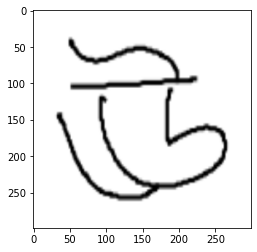

In [16]:
plt.imshow(train_x[2120])

In [17]:


import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense , Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model

from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense , Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D

# Defining ResNet50


In [18]:
# print(train_x)


In [32]:
train_y


matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [34]:
# model = ResNet50(input_shape= (224, 224,3), classes =52)

model= tf.keras.applications.InceptionV3(include_top=True , classes=54, weights=None)

In [35]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [36]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

 batch_normalization_193 (Batch  (None, 35, 35, 64)  192         ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 35, 35, 64)  192         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_198 (Batch  (None, 35, 35, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 35, 35, 32)  96          ['conv2d_199[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_210 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_210[0][0]']
                                                                                                  
 conv2d_208 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_214[0][0]',         
                                                                  'activation_217[0][0]',         
                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_nor

                                                                  'activation_226[0][0]',         
                                                                  'activation_227[0][0]']         
                                                                                                  
 conv2d_232 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_232 (Batch  (None, 17, 17, 160)  480        ['conv2d_232[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_23

 batch_normalization_242 (Batch  (None, 17, 17, 160)  480        ['conv2d_242[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_242 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_242[0][0]']
                                                                                                  
 conv2d_243 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_242[0][0]']         
                                                                                                  
 batch_normalization_243 (Batch  (None, 17, 17, 160)  480        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_253 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_252[0][0]']         
                                                                                                  
 batch_normalization_253 (Batch  (None, 17, 17, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 conv2d_249 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_253[0][0]']         
          

 activation_261 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_258 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_262 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_258 (Batch  (None, 17, 17, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 17, 17, 192)  576        ['conv2d_262[0][0]']             
 Normaliza

 conv2d_272 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_25[0][0]']   
                                                                                                  
 batch_normalization_264 (Batch  (None, 8, 8, 320)   960         ['conv2d_264[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_266 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_266[0][0]']
                                                                                                  
 activation_267 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_270[0][0]']
          

                                                                                                  
 activation_276 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_276[0][0]']
                                                                                                  
 activation_279 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_279[0][0]']
                                                                                                  
 activation_280 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_280[0][0]']
                                                                                                  
 batch_normalization_281 (Batch  (None, 8, 8, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

In [37]:
# x_train = vectorizer.fit_transform(train_texts).todense()
# x_val = vectorizer.transform(val_texts).todense()

In [38]:
model.fit(train_x, train_y,  epochs=6, batch_size= 12)


Epoch 1/6
186/186 [==============================] - 572s 3s/step - loss: 11.2347 - accuracy: 0.9451
Epoch 2/6
186/186 [==============================] - 548s 3s/step - loss: 20.8566 - accuracy: 0.9752
Epoch 3/6
186/186 [==============================] - 550s 3s/step - loss: 37.5076 - accuracy: 0.9712
Epoch 4/6
186/186 [==============================] - 550s 3s/step - loss: 72.9663 - accuracy: 0.9541
Epoch 5/6
186/186 [==============================] - 542s 3s/step - loss: 136.1081 - accuracy: 0.9266
Epoch 6/6
186/186 [==============================] - 552s 3s/step - loss: 176.6659 - accuracy: 0.9298


In [ ]:
# indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64)
# values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32)
# dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)

In [39]:
predictions = model.evaluate(test_x,test_y)
print("Loss = " + str(predictions[0]))
print("Test Accuracy = " + str(predictions[1]))

4/4 [==============================] - 5s 875ms/step - loss: 125.4078 - accuracy: 0.9316
Loss = 125.40778350830078
Test Accuracy = 0.9316239356994629


In [40]:
import pickle

In [41]:
with open('model_InceptionV3_Stored','wb') as file:
    pickle.dump(model,file)

INFO:tensorflow:Assets written to: ram://5307b8fa-2215-435b-a64b-1b8c91a9899e/assets


INFO:tensorflow:Assets written to: ram://5307b8fa-2215-435b-a64b-1b8c91a9899e/assets
